In [191]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Sweet, that was easy! Let's load up the package and the embedding library.


In [192]:
import spacy
embedder = spacy.load('en_core_web_lg')

In [239]:
board_input  = 'STEEL CHURCHILL OPERA BULB NOTRE PASTE HEAD FIELD COVER SATURN COLOSSEUM PEARL CLEOPATRA NYLON MARIE GEAR UNICORN HELMET GATES SPRAY SPINE SILK ROAD COUNTRY STRING'
words = embedder(board_input)

In [232]:
def WordDistance(clue_word, board_words, guess_num:int):
    
    ## clue_word (token) - The word given to the Operative as a clue
    ## board_wors (list of token) - Words remaining on the board
    ## guess_num (int) - Number of board_words linked to this clue_word    
    
    # Create dictionary to hold distance of board words to clue word
    dist_dict = {str(board_word): '' for board_word in words}
    
    # Calculate distances and add to dictionary
    for board_word in board_words:
    
        dist_dict[str(board_word)]= (np.linalg.norm(board_word.vector - clue_word.vector))
    
    # Order dictionary
    dists = [v for k, v in sorted(dist_dict.items(), key=lambda item: item[1])]
    dist_dict = {v: k for k, v in sorted(dist_dict.items(), key=lambda item: item[1])}
    
    return [dist_dict[key] for key in dists[:guess_num]]

In [298]:
conda install seaborn

Solving environment: ...working... done


Note: you may need to restart the kernel to use updated packages.## Package Plan ##






==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




  environment location: C:\Users\andre\anaconda3\envs\CodenamesBot

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.7.5   |       haa95532_1         113 KB
    certifi-2021.5.30          |   py38haa95532_0         140 KB
    openssl-1.1.1k             |       h2bbff1b_0         4.8 MB
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> pkgs/main::ca-certificates-2021.7.5-haa95532_1
  certifi                anaconda::certifi-2020.6.20-py38_0 --> pkgs/main::certifi-2021.5

In [360]:
import seaborn as sns

def WordDistance(clue_word, board_words, guess_num:int):
    
    ## clue_word (token) - The word given to the Operative as a clue
    ## board_wors (list of token) - Words remaining on the board
    ## guess_num (int) - Number of board_words linked to this clue_word    
    
    # Create dictionary to hold distance of board words to clue word
    word_dict = {str(board_word): '' for board_word in words}
    
    # Calculate distances and add to dictionary
    for board_word in board_words:
    
        word_dict[str(board_word)]= (np.linalg.norm(board_word.vector - clue_word.vector))
    
    # Order dictionary
    dists = [v for k, v in sorted(word_dict.items(), key=lambda item: item[1])]
    dist_dict = {v: k for k, v in sorted(word_dict.items(), key=lambda item: item[1])}
    
    # Colour heatmap
    board_array = np.empty(shape=(5,5))
    labels_array = np.array([['                             ']*5]*5)
    
    for i, word in enumerate(board_words):
        
        board_array[int(np.floor(i/5))][i%5] = word_dict[str(word)]
        labels_array[int(np.floor(i/5))][i%5] = str(word)
        
    sns.heatmap(board_array, annot=labels_array, fmt='')
    
    
    
    
    return board_array, labels_array

(array([[9.19164562, 9.10949802, 8.69511223, 9.13299465, 9.14319229],
        [9.03399181, 6.96477747, 8.35837746, 7.64974403, 9.38598347],
        [9.89105225, 8.31182003, 9.13548279, 8.74063301, 8.93986797],
        [7.56513643, 7.5803566 , 6.82366943, 8.89630508, 8.70405674],
        [9.4579916 , 7.69441605, 8.37410927, 8.30382252, 8.74119091]]),
 array([['STEEL', 'CHURCHILL', 'OPERA', 'BULB', 'NOTRE'],
        ['PASTE', 'HEAD', 'FIELD', 'COVER', 'SATURN'],
        ['COLOSSEUM', 'PEARL', 'CLEOPATRA', 'NYLON', 'MARIE'],
        ['GEAR', 'UNICORN', 'HELMET', 'GATES', 'SPRAY'],
        ['SPINE', 'SILK', 'ROAD', 'COUNTRY', 'STRING']], dtype='<U29'))

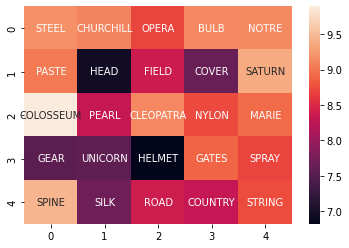

In [373]:
WordDistance(embedder('HAT'), words, 3)